In [1]:
pip install pyvis

In [2]:
from google.colab import drive
import numpy as np 
import math
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pylab
from pyvis.network import Network
from IPython.display import HTML


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Leitura dos dados

In [4]:
df_result = pd.read_csv(r"/content/drive/My Drive/BI Master/Trabalho Final/output/cluster-result.csv")

#Primeira coluna não tem valor
df_result = df_result.iloc[: , 1:]
df_result.head()



,machine_status,KMeans-10,KMeans-100,KMeans-200
0,NORMAL,7,90,66
1,NORMAL,7,90,66
2,NORMAL,7,90,66
3,NORMAL,7,90,66
4,NORMAL,7,90,66


In [5]:
df_result_pca = pd.read_csv(r"/content/drive/My Drive/BI Master/Trabalho Final/output/cluster-result-pca.csv")
#Primeira coluna não tem valor
df_result_pca = df_result_pca.iloc[: , 1:]
df_result_pca.head()

,machine_status,MeanShift-05,MeanShift-175,MeanShift-01,KMeans-10,KMeans-100,KMeans-200
0,NORMAL,-1,2,3694,0,25,136
1,NORMAL,-1,2,3694,0,25,136
2,NORMAL,-1,2,929,0,25,136
3,NORMAL,4,2,-1,0,73,136
4,NORMAL,4,2,-1,0,73,136


In [6]:
df_pca_data = pd.read_csv(r"/content/drive/My Drive/BI Master/Trabalho Final/output/pca-data.csv")
df_pca_data = df_pca_data.iloc[: , 1:]
df_pca_data.head()

,PC0,PC1,PC2
0,-0.007543,0.026688,-0.532230
1,-0.007543,0.026688,-0.532230
2,-0.019496,0.016363,-0.552542
3,-0.010636,0.024393,-0.575779
4,-0.012581,0.012128,-0.588826


##Funções úteis na análise

In [7]:
def getLabelsBroken(data, algorithm):
  labelsBroken = data[data['machine_status'] == "BROKEN"][algorithm]
  labelsBroken = labelsBroken.drop_duplicates()
  return labelsBroken

def getAllLabels(data, algorithm):
  labelsOther = data[algorithm]
  labelsOther = labelsOther.drop_duplicates()
  return labelsOther

def getGraphParams(data, algorithm):
  a = data[[algorithm]]
  ori = a[:-1].values
  dest = a[1:].values
  #[a[:1], a[1:]]
  #edges = np.column_stack(a[1:].to_vector(), a[:-1])
  #edges
  dfgrafo = pd.DataFrame(ori, columns = ['Origem'])
  dfgrafo = dfgrafo.assign(Destino=pd.DataFrame(dest))
  dfgrafo = dfgrafo[dfgrafo['Origem']!=dfgrafo['Destino']]
  dfgrafo = dfgrafo.groupby(["Origem", "Destino"]).size()
  return dfgrafo

In [8]:
def build3DGraph (df_pca, labels): 
  fig = plt.figure(figsize=(26,6))
  ax = fig.add_subplot(131, projection='3d')
  ax.scatter(df_pca['PC0'], df_pca['PC1'], df_pca['PC2'], c=labels, s=15)

In [9]:
def countLabelsBroken(data, algorithm): 
  d = data.groupby([algorithm, "machine_status"]).size()
  return d[getLabelsBroken(data, algorithm).values]


In [10]:
def buildGraph(data, algorithm, name):
  labelsBroken = getLabelsBroken(data, algorithm)
  
  labelsOther = getAllLabels(data, algorithm)
  dfgrafo = getGraphParams(data, algorithm)

  net = Network(height='750px', width='100%', directed=True)
  net.barnes_hut()
  for index, value in labelsOther.items():
    cor = 'blue'
    if value in labelsBroken.values: 
      cor = 'red'
    net.add_node(value, label=value, color=cor)

  for index, value in dfgrafo.items():
    net.add_edge(index[0], index[1], title=value )
  path = '/content/drive/My Drive/BI Master/Trabalho Final/output/grafo-' + name + '-' + algorithm  + '.html'
  net.show(path)
  return path

# Análise dos Resultados 

Para cada teste executado, será plotado um gráfico em 3 dimensões, onde os eixos são os componentes principais e as cores representam os clusters obtidos no algoritmo de clusterização. 
Será plotado também um grafo direcionado onde os nós representam os clusters obtidos nos algoritmos e as arestas simbolizam uma mudança de um cluster para o outro. Por exemplo, se há uma aresta partindo do nó 10 para o nó 7, significa que na sequencia dos dados, houve uma transição do cluster 10 para o cluster 7. Os nós vermelhos simbolizam clusters com status de falha. 

##Análise KMeans sem redução de dimensionalidade

###K=10

In [11]:
countLabelsBroken( df_result, "KMeans-10")

KMeans-10  machine_status
3          BROKEN                1
           NORMAL             2251
           RECOVERING         7887
7          BROKEN                3
           NORMAL            44421
           RECOVERING           19
8          BROKEN                1
           NORMAL             2874
           RECOVERING          102
0          BROKEN                2
           NORMAL            38515
           RECOVERING           14
dtype: int64

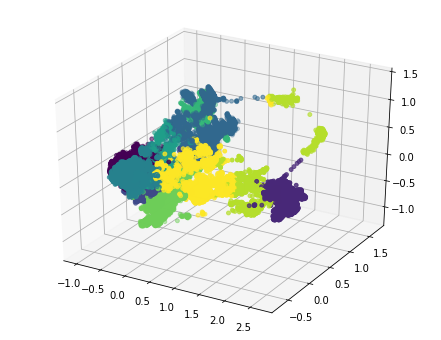

In [12]:
build3DGraph (df_pca_data, df_result['KMeans-10'])


In [13]:
r = buildGraph(df_result, 'KMeans-10', 'complete')
HTML(filename=r)

### K=100

In [14]:
countLabelsBroken( df_result, "KMeans-100")

KMeans-100  machine_status
92          BROKEN               1
            NORMAL               2
            RECOVERING         595
61          BROKEN               1
            NORMAL             730
            RECOVERING          14
87          BROKEN               1
            NORMAL            2205
            RECOVERING           2
22          BROKEN               1
            NORMAL            3623
            RECOVERING           1
65          BROKEN               1
            NORMAL              58
            RECOVERING         132
35          BROKEN               1
            NORMAL             719
            RECOVERING          88
1           BROKEN               1
            NORMAL            4046
            RECOVERING           2
dtype: int64

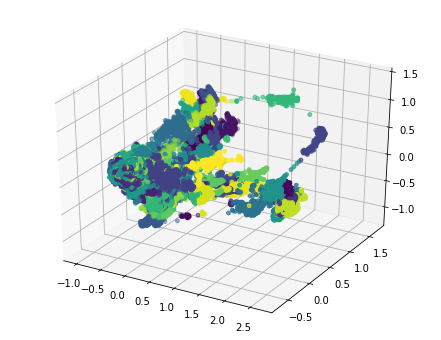

In [15]:
build3DGraph (df_pca_data, df_result['KMeans-100'])


In [16]:
r = buildGraph(df_result, 'KMeans-100', 'complete')
HTML(filename=r)

### K=200

In [17]:
countLabelsBroken(df_result, "KMeans-200")

KMeans-200  machine_status
153         BROKEN               1
            NORMAL               9
            RECOVERING          86
71          BROKEN               1
            NORMAL             520
            RECOVERING           6
65          BROKEN               1
            NORMAL            1755
            RECOVERING           1
106         BROKEN               1
            NORMAL             107
            RECOVERING           5
57          BROKEN               1
            NORMAL              58
            RECOVERING         128
47          BROKEN               1
            NORMAL             514
            RECOVERING          47
2           BROKEN               1
            NORMAL            3038
            RECOVERING           3
dtype: int64

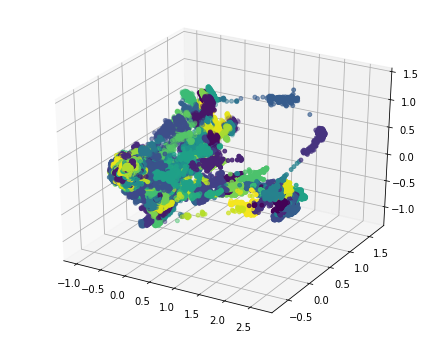

In [18]:
build3DGraph (df_pca_data, df_result['KMeans-200'])


In [19]:
r = buildGraph(df_result, 'KMeans-200', 'complete')
HTML(filename=r)

##Análise KMeans com redução de dimensionalidade

###K=10

In [20]:
countLabelsBroken( df_result_pca, "KMeans-10")

KMeans-10  machine_status
6          BROKEN                1
           NORMAL             1930
           RECOVERING         5934
7          BROKEN                2
           NORMAL            18035
           RECOVERING            9
0          BROKEN                1
           NORMAL            41767
           RECOVERING           11
9          BROKEN                1
           NORMAL              344
           RECOVERING          127
5          BROKEN                1
           NORMAL            41695
           RECOVERING           57
2          BROKEN                1
           NORMAL            75003
           RECOVERING            1
dtype: int64

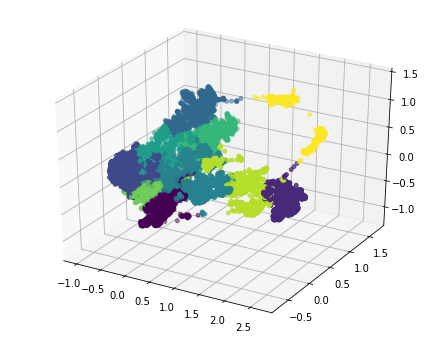

In [21]:
build3DGraph (df_pca_data, df_result_pca['KMeans-10'])


In [22]:
r = buildGraph(df_result_pca, 'KMeans-10', 'pca')
HTML(filename=r)

### K=100

In [23]:
countLabelsBroken( df_result_pca, "KMeans-100")

KMeans-100  machine_status
48          BROKEN               2
            NORMAL             568
            RECOVERING          50
0           BROKEN               1
            NORMAL            2329
24          BROKEN               1
            NORMAL            3403
            RECOVERING           3
32          BROKEN               1
            NORMAL              57
            RECOVERING         127
77          BROKEN               1
            NORMAL            1638
            RECOVERING           9
18          BROKEN               1
            NORMAL            3587
            RECOVERING           1
dtype: int64

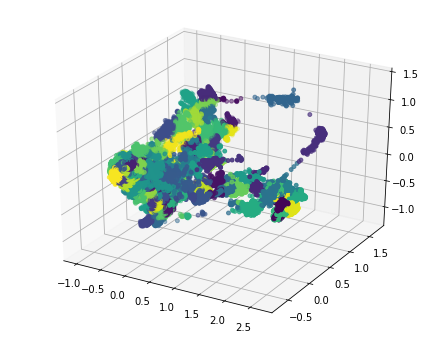

In [24]:
build3DGraph (df_pca_data, df_result_pca['KMeans-100'])


In [25]:
r = buildGraph(df_result_pca, 'KMeans-100', 'pca')
HTML(filename=r)

### K=200

In [26]:
countLabelsBroken(df_result_pca, "KMeans-200")

KMeans-200  machine_status
169         BROKEN               1
            NORMAL             224
            RECOVERING          23
90          BROKEN               1
            NORMAL             141
            RECOVERING          14
174         BROKEN               1
            NORMAL             546
183         BROKEN               1
            NORMAL            1679
111         BROKEN               1
            NORMAL              57
            RECOVERING          51
46          BROKEN               1
            NORMAL             560
            RECOVERING           3
92          BROKEN               1
            NORMAL            1292
            RECOVERING           1
dtype: int64

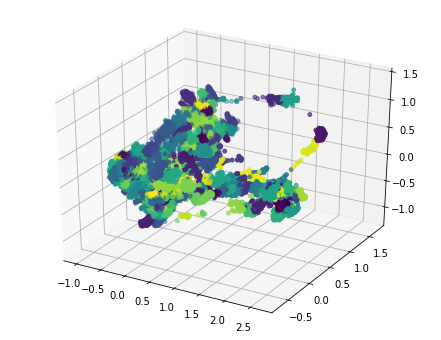

In [27]:
build3DGraph (df_pca_data, df_result_pca['KMeans-200'])


In [39]:
r = buildGraph(df_result_pca, 'KMeans-200', 'pca')
HTML(filename=r)

##Análise MeanShift com redução de dimensionalidade

###K=0,175

In [ ]:
countLabelsBroken( df_result_pca, "MeanShift-175")

KMeans-10  machine_status
6          BROKEN                1
           NORMAL             1930
           RECOVERING         5934
7          BROKEN                2
           NORMAL            18035
           RECOVERING            9
0          BROKEN                1
           NORMAL            41767
           RECOVERING           11
9          BROKEN                1
           NORMAL              344
           RECOVERING          127
5          BROKEN                1
           NORMAL            41695
           RECOVERING           57
2          BROKEN                1
           NORMAL            75003
           RECOVERING            1
dtype: int64

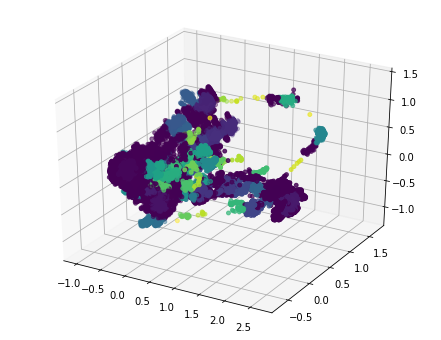

In [29]:
build3DGraph (df_pca_data, df_result_pca['MeanShift-175'])


In [30]:
r = buildGraph(df_result_pca, 'MeanShift-175', 'pca')
HTML(filename=r)

### K=0.05

In [31]:
countLabelsBroken( df_result_pca, "MeanShift-05")

MeanShift-05  machine_status
-1            BROKEN                 3
              NORMAL            151096
              RECOVERING          5385
 414          BROKEN                 1
              NORMAL                 1
              RECOVERING             4
 8            BROKEN                 1
              NORMAL              1171
              RECOVERING             2
 184          BROKEN                 1
              NORMAL                22
              RECOVERING            19
 486          BROKEN                 1
              NORMAL                 4
dtype: int64

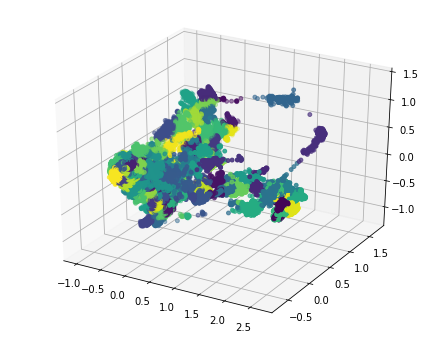

In [32]:
build3DGraph (df_pca_data, df_result_pca['KMeans-100'])


In [33]:
r = buildGraph(df_result_pca, 'MeanShift-05', 'pca')
HTML(filename=r)

# K=0.01

In [34]:
countLabelsBroken(df_result_pca, "MeanShift-01")

MeanShift-01  machine_status
 30347        BROKEN                1
 30781        BROKEN                1
 31653        BROKEN                1
 3220         BROKEN                1
              NORMAL               12
 20191        BROKEN                1
              RECOVERING            1
 37662        BROKEN                1
-1            BROKEN                1
              NORMAL            20482
              RECOVERING         2202
dtype: int64

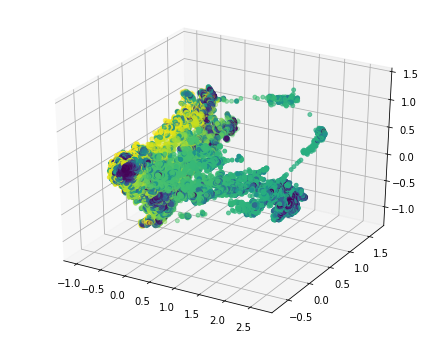

In [35]:
build3DGraph (df_pca_data, df_result_pca['MeanShift-01'])


In [41]:
r = buildGraph(df_result_pca, 'MeanShift-01', 'pca')
HTML(filename=r)

Output hidden; open in https://colab.research.google.com to view.